# Explore here

In [32]:
import pandas as pd
import urllib.request
import ssl

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# escalado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#modelado
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [33]:
# Cargamos el Dataset y lo guardamos en raw para poderlo leer:

from ssl import _create_unverified_context

url ="https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"

ssl_context = urllib.request.urlopen(url, context=ssl._create_unverified_context())
df=pd.read_csv(ssl_context, index_col=None, delimiter=",")

df.to_csv ("/Users/nataliagarciavila/Desktop/4 GEEKS ACADEMY/CLASES_EJERCICIOS_/CLASES_EJERCICIOS_/EJERCICIOS/EJERCICIOS CLASE 17-18:: MACHINE LEARNING/CLASE EJERCICIOS 18/machine-learning-python-template/data/raw/data.csv")

df.head()



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
#Conocer las dimensiones y tipologías de datos del objeto con el que estamos trabajando es vital

df.shape

(1338, 7)

In [35]:
# Obtener información sobre tipos de datos y valores no nulos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [36]:
#Utilizamos el método 'isna' para conocer cuántos valores nulos hay por columna:

total_nans = df.isna().sum()
total_nans

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [37]:
#Usamos el método duplicated() para detectar duplicados en un DataFrame y sum() para contar el número de duplicados.

duplicados = df.duplicated()
num_duplicados = duplicados.sum()
duplicados

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

En este caso como todos los datos son relevantes para el análisis socio-demogáfico de salud,no consideramos el hecho de eliminar ningún dato.

In [38]:
# Creamos una lista de arrays con las filas indicadas:
rows_to_filter= ["age","sex","bmi","children","smoker","region","charges"]

# Eliminamos las filas donde cualquier fila en 'rows_to_filter' tiene el valor 'unknown':

for rows in rows_to_filter:
    df = df[df[rows] != 'unknown']

print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


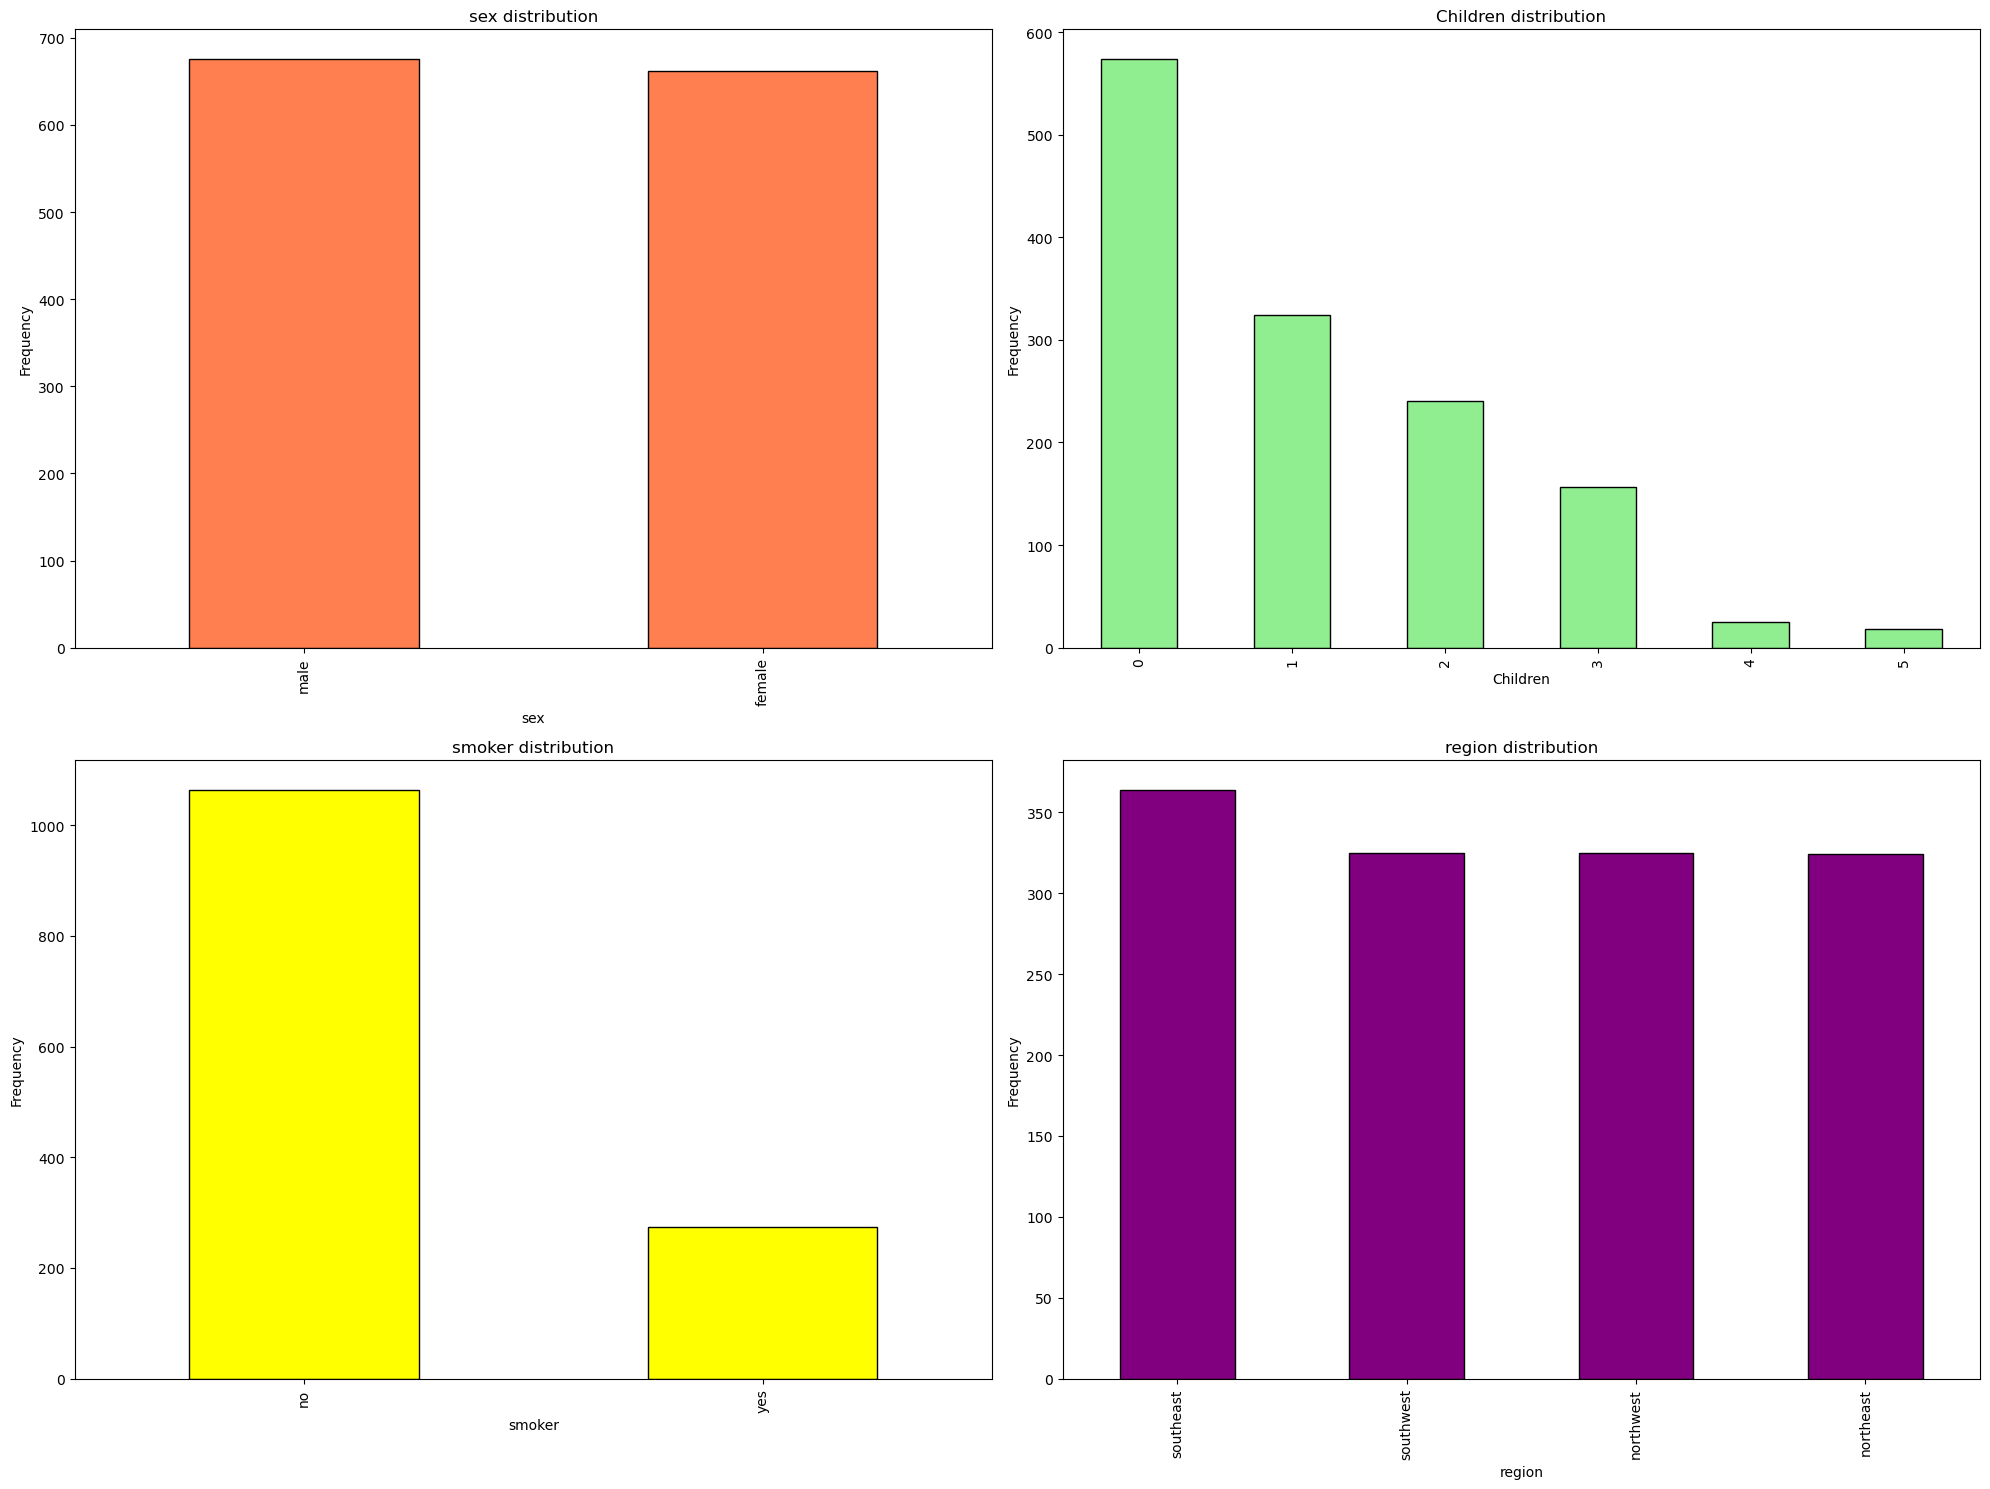

In [39]:
# Vamos a definir las variantes tanto categóricas como univariantes. Primero empezaremos analizando las categóricas:

fig, axes = plt.subplots(2 ,2, figsize=(20, 15))

# Bar plot para "sex"

df['sex'].value_counts().plot(kind= "bar", ax=axes[0,0], color="coral", edgecolor="k")

axes[0,0].set_title('sex distribution')
axes[0,0].set_xlabel('sex')
axes[0,0].set_ylabel('Frequency')

# Bar plot para "children"
df["children"].value_counts().plot(kind= "bar", ax=axes[0,1], color="lightgreen", edgecolor="k")

axes[0,1].set_title('Children distribution')
axes[0,1].set_xlabel('Children')
axes[0,1].set_ylabel('Frequency')

# Bar plot para "smoker"
df["smoker"].value_counts().plot(kind= "bar", ax=axes[1,0], color="yellow", edgecolor="k")

axes[1,0].set_title('smoker distribution')
axes[1,0].set_xlabel('smoker')
axes[1,0].set_ylabel('Frequency')

# Bar plot para "region"
df["region"].value_counts().plot(kind= "bar", ax=axes[1,1], color="purple", edgecolor="k")

axes[1,1].set_title('region distribution')
axes[1,1].set_xlabel('region')
axes[1,1].set_ylabel('Frequency')

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()



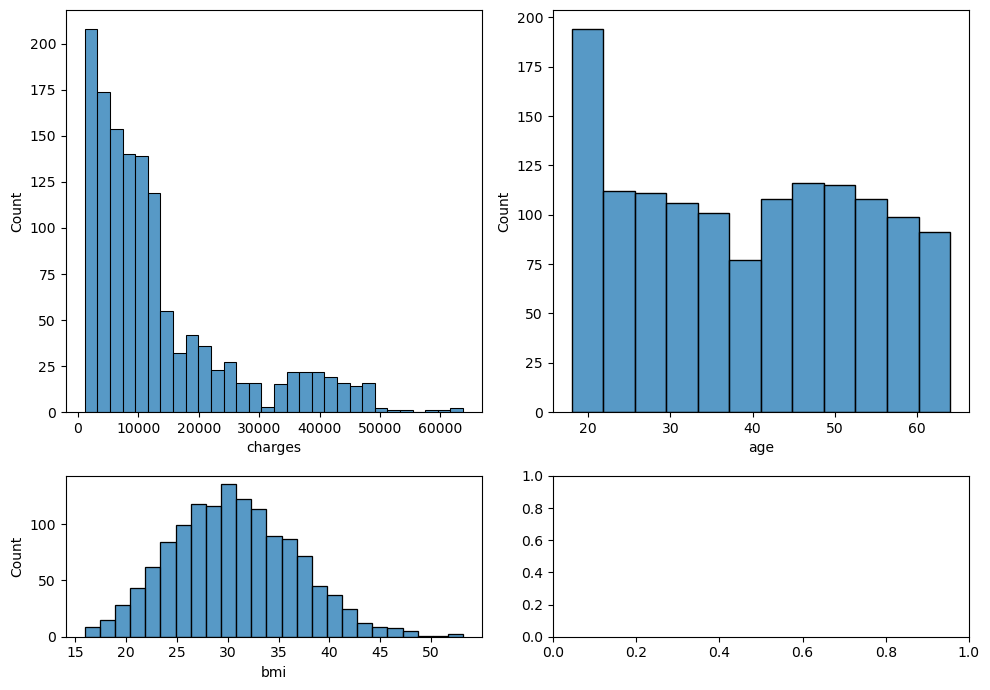

In [40]:
# Vamos a definir las variantes univariantes numéricas:

import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots (2,2,figsize = (10,7), gridspec_kw={'height_ratios': [5,2]})

# Crear un histograma múltiple

sns.histplot(ax = axis[0, 0], data = df, x = "charges")

sns.histplot(ax = axis[0,1], data = df, x = "age")

sns.histplot(ax = axis[1,0], data = df, x = "bmi")

#fig.delaxes(axes[1,1])
#fig.delaxes(axes[2,0])
#fig.delaxes(axes[2,1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Como podemos observar en estas gráficas, tenemos los siguientes resultados:

- Charges. Prima del seguro médico (numérico): El precio a pagar por prima de seguro estaría por debajo de los 10.000€, aproximadamente a unos 5000€.

- Age: Alrededor de unos 180 clientes de 4Geeks Insurance S.L, ronda los 20 años de edad.

- BMI Índice de masa corporal: Aproximadamente unos 130 clientes tienen un índice de masa corporal de 30.

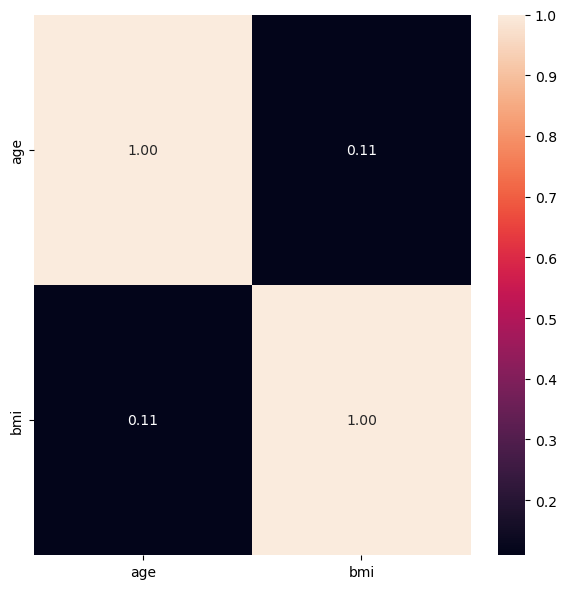

In [51]:
fig, axis = plt.subplots(figsize = (6,6))

sns.heatmap(df[["age","bmi"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

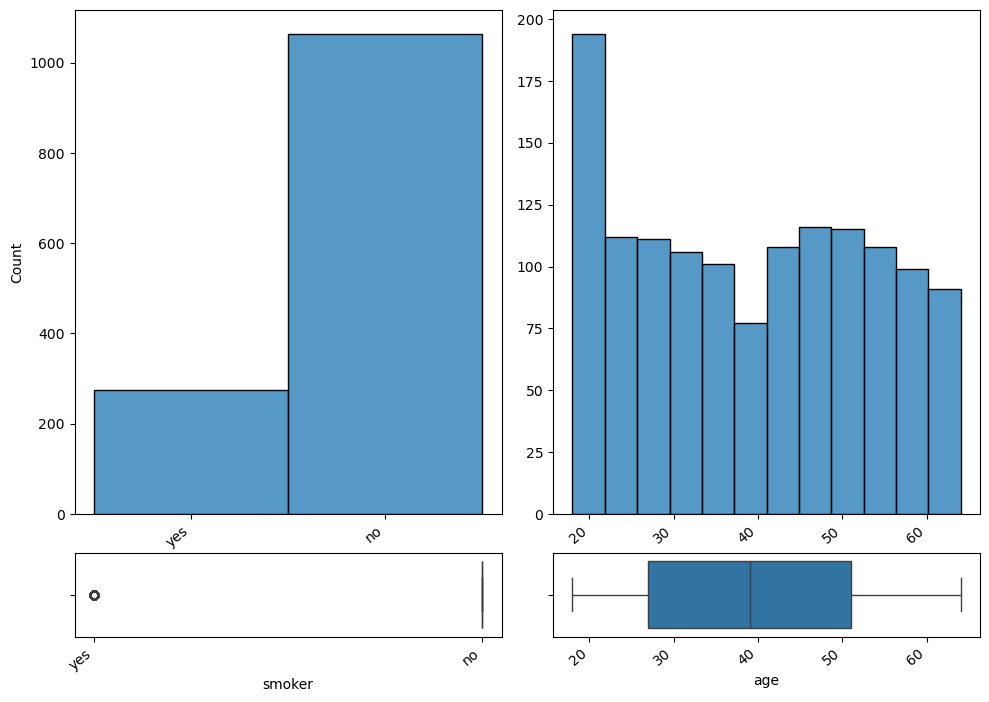

In [ ]:
# Vamos a definir las variantes de smoker y age:

fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df, x = "smoker").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "smoker")
sns.histplot(ax = axis[0, 1], data = df, x = "age").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "age")

# Ajustar el layout
plt.tight_layout()

for ax in axis.flat:
    plt.sca(ax)
    plt.xticks(rotation=40,ha="right")
    
# Mostrar el plot
plt.show()

Mirando las gráficas que tenemos aqui de fumadores y edad, vemos que la mayoría de clientes (aprox.185-190 clientes) que rondan la veintena, NO son fumadores.

La mayoría de fumadores se comprenden entre los 27-28 años, hasta los 51-52 años aprox.

Así que, sí tenemos que tener en cuenta estas dos variables para poder calcular la prima del seguro médico, como los fumadores tienen más riesgo de contraer enfermedades de carácter cardiovascular y pulmonar, estas edades son las que tendríamos que tener en cuenta para poder calcular su prima del seguro según si son fumadores o no.

VALORES ATÍPICOS (OUTLIERS)

In [ ]:
# Vamos a ver cuáles son nuestros outliers para que nuestro dataset quede lo más limpio posible.

#El análisis descriptivo es una poderosa herramienta para caracterizar el conjunto de datos:

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


IndexError: index 3 is out of bounds for axis 0 with size 2

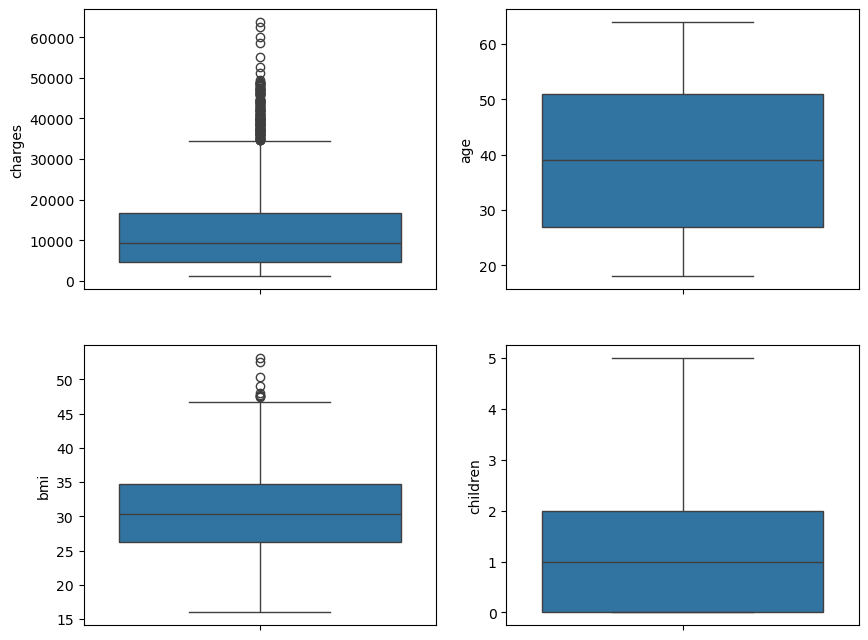

In [ ]:
#Dibujar los diagramas de cajas de las variables nos da información poderosa para ver los valores atípicos:

fig, axis = plt.subplots(2,2, figsize = (10, 8))

sns.boxplot(ax = axis[0,0], data = df, y = "charges")
sns.boxplot(ax = axis[0,1], data = df, y = "age")
sns.boxplot(ax = axis[1,0], data = df, y = "bmi")
sns.boxplot(ax = axis[1,1], data = df, y = "children")


fig.delaxes(axis[3,3])
plt.tight_layout()

plt.show()

Interpretación boxplot box:
Cuadro: representa el rango intercuartil (IQR), donde se encuentra el 50% medio de los valores RMSE. La línea dentro del cuadro muestra la mediana RMSE.
Bigotes: Extender a los valores mínimo y máximo dentro de 1,5 * RIQ de los cuartiles.
Valor atípico: cualquier punto fuera de los bigotes se considera un valor atípico. En este gráfico, hay un valor atípico que indica que un pliegue tenía un RMSE 

Vamos a ver qué valores faltantes o nulos tenemos en nuestro Dataset:

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Como vemos que está limpio, pasamos a codificar, escalar y modelar

CODIFICACIÓN

In [ ]:

#-Codificar:
#Vamos a codificar las variables categóricas
df_encoded_copy=df_encoded.copy()

# instancio el encoder
label_encoder_neighbourhood = LabelEncoder()

# entreno el encoder con los datos de entrenamiento
label_encoder_neighbourhood.fit(df_encoded["sex"])

# aplico el encoder en amhos
df_encoded_copy["sex_le"]= label_encoder_neighbourhood.transform(df_encoded["sex"])

df_encoded_copy.head()


,age,sex,bmi,children,smoker,region,charges,sex_le
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [ ]:

onehotencoder_variables=["smoker","region"]

# instancio el encoder
onehot_encoder = OneHotEncoder(sparse_output=False)

# entreno el encoder con los datos de entrenamiento
onehot_encoder.fit(df_encoded[onehotencoder_variables])

# aplico el encoder en amhos
df_encoded_copy_ohe= onehot_encoder.transform(df_encoded[onehotencoder_variables])
df_encoded_copy_ohe = pd.DataFrame(df_encoded_copy_ohe, index = df_encoded.index, columns=onehot_encoder.get_feature_names_out(onehotencoder_variables))


df_encoded_copy_ohe.head()

,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_encoded_copy.head()

,age,sex,bmi,children,smoker,region,charges,sex_le
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [ ]:
#Vamos a juntar los dos Dataframes

df_encoded_final=pd.concat([df_encoded_copy,df_encoded_copy_ohe], axis=1)
df_encoded_final.head()

,age,sex,bmi,children,smoker,region,charges,sex_le,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,1,1.0,0.0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,1,1.0,0.0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,1,1.0,0.0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,1,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_encoded_final.dtypes

age                   int64
sex                  object
bmi                 float64
children              int64
smoker               object
region               object
charges             float64
sex_le                int64
smoker_no           float64
smoker_yes          float64
region_northeast    float64
region_northwest    float64
region_southeast    float64
region_southwest    float64
dtype: object

In [42]:
#Quitamos las columnas donde el datatype es "object"

df_encoded_final= df_encoded_final.select_dtypes(exclude="object")

In [ ]:
# Dividimos el conjunto de datos en muestras de train y test

X = df_encoded_final.drop("age", axis = 1)
y = df_encoded_final["age"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


X_train.head()

,bmi,children,charges,sex_le,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,19.95,2,9193.83850,0,1.0,0.0,0.0,1.0,0.0,0.0
1285,24.32,0,8534.67180,0,1.0,0.0,1.0,0.0,0.0,0.0
1142,24.86,0,27117.99378,0,1.0,0.0,0.0,0.0,1.0,0.0
969,34.32,5,8596.82780,0,1.0,0.0,0.0,0.0,1.0,0.0
486,21.47,3,12475.35130,0,1.0,0.0,0.0,1.0,0.0,0.0


MODELADO

In [ ]:
#Vamos a modelar para así poder sacar nuestro análisis:

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

# Display the evaluation metrics
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R-squared: {train_r2}")
print(f"Test R-squared: {test_r2}")

Train RMSE: 12.002626728100328
Test RMSE: 11.961023057975009
Train R-squared: 0.2720089512432735
Test R-squared: 0.26353560886850624


/Users/nataliagarciavila/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/nataliagarciavila/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
